# 0. Pipeline
* Import libararies
* Import Datasets
* Split the data into train_test
* Got idea about the input and output shape of the data
* Visualize the data and get insights of the data
* Segment the data into batch size by dataloader
* Got insight about the single batch of the data
* Create a baseline model
* Set Loss and Optimizer Function
* Train and Test Loop
* Evaluation Mode:
    * Time tracking
    * Returns a dictionary which shows the result
* Fit the model
* 

In [1]:
# Import Libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# TorchVision Libraries
from torchvision import datasets
from torchvision.transforms import ToTensor



In [2]:
# Train and Test Dataset
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download=True,
    target_transform = None
)
test_data =  datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download=True,
)

In [3]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# 1. Input and Output shapes of Computer vision model

In [4]:
img,label = train_data[0]
img,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
# Shapes of input 
print(f"Shapes of input image: {img.shape} and Label: {label}")

# Number of Samples
print(f"Number of samples in train data: {len(train_data)}")
print(f"Number of samples in test data: {len(test_data)}")

Shapes of input image: torch.Size([1, 28, 28]) and Label: 5
Number of samples in train data: 60000
Number of samples in test data: 10000


In [6]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Visualize the Data

(-0.5, 27.5, 27.5, -0.5)

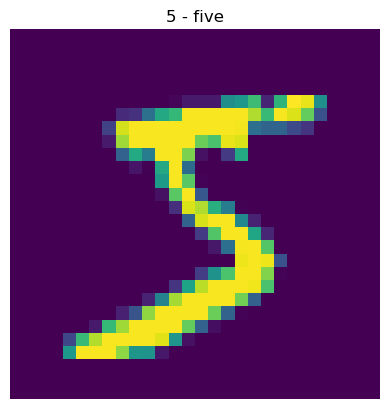

In [8]:
plt.imshow(img.squeeze())
plt.title(class_names[label])
plt.axis(False)

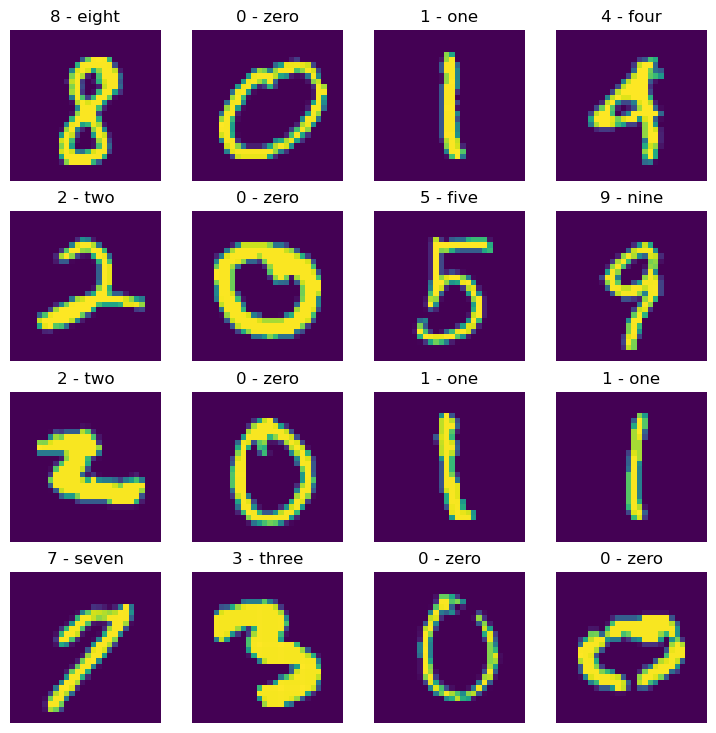

In [9]:
# Randomly visualize some of the training data
# First of all I need randomly initiate index

import random
plt.figure(figsize = (9,9))
rows,cols = 4,4
random_idx = np.random.randint(0,len(train_data),16)
for idx,i in enumerate(random_idx):
    plt.subplot(4,4,idx+1)
    img,label = train_data[i]
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False)
        


# 2. DataLoader (Prepare train and test Data)


In [10]:
from torch.utils.data.dataloader import DataLoader

# batch size
Batch_size = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = Batch_size,
                             shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size=Batch_size,
                            shuffle = True)

In [11]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1695e4ed0>,
 <torch.utils.data.dataloader.DataLoader at 0x169793c10>)

In [12]:
train_dataloader.dataset,test_dataloader.dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
print(f" Length of train data: {len(train_dataloader)} batches of 32")
print(f" Length of test data: {len(test_dataloader)} batches of 32")

 Length of train data: 1875 batches of 32
 Length of test data: 313 batches of 32


In [14]:
train_features_batch,train_features_label =next(iter(train_dataloader))
print(train_features_batch.shape)
print(train_features_label.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


# 3. Create a Baseline model

In [15]:
from torch import nn

class MNISTModelV0(nn.Module):
    def __init__(self,
                input_image_shape:int,
                hidden_unit_shape:int,
                output_unit_shape:int):
        super().__init__()


        self.stack_model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_image_shape,
                     out_features=hidden_unit_shape),
            nn.Linear(in_features = hidden_unit_shape,
                     out_features = output_unit_shape)
        )


    def forward(self,x):
        return self.stack_model(x)

In [16]:
## Device Agnostic Code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [17]:
# Create a instance of the model and pass it to the device
torch.manual_seed(42)
torch.mps.manual_seed(42)
model_0 = MNISTModelV0(input_image_shape=784,
                       hidden_unit_shape=10,
                       output_unit_shape=len(class_names)).to(device)

In [18]:
model_0

MNISTModelV0(
  (stack_model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
## Loss and Optimizer
loss_fn = nn.CrossEntropyLoss() # as it is a classification model

optimizer = torch.optim.Adam(model_0.parameters(),
                            lr = 0.001)


In [20]:
# Accuracy Function
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("Helper Functions already available, Skip downloading.....")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
        print("Download Complete")


Helper Functions already available, Skip downloading.....


In [21]:
from helper_functions import accuracy_fn

## Train and Test Loop Function

In [22]:
def train_loop(model: torch.nn.Module,
              data: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device):
    model.to(device)
    train_loss,accuracy = 0,0

    model.train()

    for X_train_batch,y_label in data:
        X_train_batch,y_label = X_train_batch.to(device),y_label.to(device)

        # 1. Forward Pass
        y_logit = model(X_train_batch)
        
        # Turn logit into pred_probs
        y_pred_label = torch.softmax(input = y_logit,
                              dim = 1).argmax(dim=1)
        
        # 2. Loss & Accuracy Calculation
        loss = loss_fn(y_logit,y_label) #y_logit is the loss of a whole batch --> basically loss of 32 images
        train_loss +=loss #accumulate the whole loss of the dataset
        acc = accuracy_fn(y_true = y_label,
                         y_pred=y_pred_label)
        accuracy +=acc

        # 3. Optimizer gradient zero
        optimizer.zero_grad()

        # 4. Backward Propagation
        loss.backward()

        # 5. gradient step
        optimizer.step()


    # Calculate the average loss and accuracy of the whole dataset and manifest them
    average_train_loss = train_loss/len(data)
    average_accuracy = accuracy / len(data)

    print(f"Total Train Loss: {average_train_loss:.3f} | Train Accuracy: {average_accuracy:.3f}")

In [23]:
def test_loop(model: torch.nn.Module,
             data: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device):
    model.to(device)
    test_loss,test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for X_test_batch,y_batch_label in data:
            X_test_batch,y_batch_label =X_test_batch.to(device),y_batch_label.to(device)
    
    
            # 1. Forward Pass
            y_test_logit = model(X_test_batch)
    
            # Turn logit into prediction probabilities
            y_pred_prob = torch.softmax(input = y_test_logit,
                                       dim =1).argmax(dim =1)
    
            # 2. Loss Calculation
            loss = loss_fn(y_test_logit,
                          y_batch_label)
            test_loss +=loss
            accuracy = accuracy_fn(y_true = y_batch_label,
                                  y_pred = y_pred_prob)
            test_acc +=accuracy
    
        avg_test_loss = test_loss/len(data)
        avg_accuracy = test_acc/len(data)

        print(f"Test Loss: {avg_test_loss} | Accuracy: {avg_accuracy}")
            
            

## Evaluation Mode

In [24]:
## Track the timer
from timeit import default_timer as timer
def time_tracking(start_time:float,
                 end_time: float,
                 device):

    duration = end_time - start_time
    print(f"Train time on device {device}: {duration} seconds")

In [25]:
def eval_mode(model: torch.nn.Module,
             data: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device):
    
    model.to(device)
    loss,acc = 0,0
    with torch.inference_mode():
        for X,y in data:
            X,y=X.to(device),y.to(device)
            
            # forward pass
            y_pred = model(X)
            
            
            pred_probs = torch.softmax(y_pred,dim=1).argmax(dim=1)

            # Loss calculation
            test_loss= loss_fn(y_pred,y)
            loss += test_loss

            accuracy = accuracy_fn(y_true = y,
                                   y_pred = pred_probs)
            acc +=accuracy

        loss /=len(data)
        acc /=len(data)
        
    return {"model":model.__class__.__name__,
            "model loss":loss.item(),
            "model accuracy":acc}
            

## Model_0's Performance on per Epoch

In [26]:
# Create the model instance
torch.manual_seed(42)
from tqdm.auto import tqdm
start_time = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}......")
    train = train_loop(model=model_0,
                      data = train_dataloader,
                       loss_fn=loss_fn,
                       optimizer = optimizer,
                       accuracy_fn =accuracy_fn,
                      device = device)
    test= test_loop(model = model_0,
                   data = test_dataloader,
                   loss_fn = loss_fn,
                   accuracy_fn = accuracy_fn,
                   device = device)
end_time = timer()

total_time = time_tracking(start_time=start_time,
                          end_time=end_time,
                          device = device)
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0......
Total Train Loss: 0.474 | Train Accuracy: 87.093
Test Loss: 0.3033526837825775 | Accuracy: 91.20407348242811
Epoch: 1......
Total Train Loss: 0.298 | Train Accuracy: 91.637
Test Loss: 0.28001609444618225 | Accuracy: 92.24241214057508
Epoch: 2......
Total Train Loss: 0.279 | Train Accuracy: 92.242
Test Loss: 0.27684852480888367 | Accuracy: 92.35223642172524
Epoch: 3......
Total Train Loss: 0.270 | Train Accuracy: 92.458
Test Loss: 0.26425379514694214 | Accuracy: 92.52196485623003
Epoch: 4......
Total Train Loss: 0.264 | Train Accuracy: 92.623
Test Loss: 0.2704828083515167 | Accuracy: 92.44209265175719
Train time on device mps: 47.18469224998262 seconds


## Get the result of model_0

In [27]:
evaluation_model_0 = eval_mode(model=model_0,
                              data= test_dataloader,loss_fn = loss_fn,
                              accuracy_fn = accuracy_fn,
                              device = device)

In [28]:
evaluation_model_0

{'model': 'MNISTModelV0',
 'model loss': 0.2704583406448364,
 'model accuracy': 92.44209265175719}

## Model 1 (Non Linearity)

In [29]:
class MNISTModelV1(nn.Module):
    def __init__(self,
                input_image_shape:int,
                hidden_unit_shape:int,
                output_unit_shape:int):
        super().__init__()


        self.stack_model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_image_shape,
                     out_features=hidden_unit_shape),
            nn.ReLU(),
            nn.Linear(in_features = hidden_unit_shape,
                     out_features = output_unit_shape)
        )


    def forward(self,x):
        return self.stack_model(x)

In [30]:
# Create an instance
model_1 = MNISTModelV1(input_image_shape=784,
                       hidden_unit_shape=10,
                       output_unit_shape=len(class_names)).to(device)

# Loss and Optimizer functions
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_1.parameters(),
                            lr = 0.001)



## Model_1's Performance on per Epoch

In [31]:
# Create the model instance
torch.manual_seed(42)
from tqdm.auto import tqdm
start_time = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}......")
    train = train_loop(model=model_1,
                      data = train_dataloader,
                       loss_fn=loss,
                       optimizer = optimizer,
                       accuracy_fn =accuracy_fn,
                      device = device)
    test= test_loop(model = model_1,
                   data = test_dataloader,
                   loss_fn = loss,
                   accuracy_fn = accuracy_fn,
                   device = device)
end_time = timer()

total_time = time_tracking(start_time=start_time,
                          end_time=end_time,
                          device = device)
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0......
Total Train Loss: 0.526 | Train Accuracy: 85.533
Test Loss: 0.3079526424407959 | Accuracy: 90.94448881789137
Epoch: 1......
Total Train Loss: 0.298 | Train Accuracy: 91.615
Test Loss: 0.2795475125312805 | Accuracy: 92.17252396166134
Epoch: 2......
Total Train Loss: 0.275 | Train Accuracy: 92.312
Test Loss: 0.2715158760547638 | Accuracy: 92.68170926517571
Epoch: 3......
Total Train Loss: 0.263 | Train Accuracy: 92.587
Test Loss: 0.2591401934623718 | Accuracy: 92.71166134185303
Epoch: 4......
Total Train Loss: 0.255 | Train Accuracy: 92.922
Test Loss: 0.2618230879306793 | Accuracy: 92.68170926517571
Train time on device mps: 52.12400645800517 seconds


## Get the result of Model_1

In [32]:
evaluation_model_1 = eval_mode(model=model_1,
                              data= test_dataloader,loss_fn = loss,
                              accuracy_fn = accuracy_fn,
                              device = device)

In [33]:
evaluation_model_1

{'model': 'MNISTModelV1',
 'model loss': 0.2618447244167328,
 'model accuracy': 92.67172523961662}

# Model 2(`CNN`)

In [34]:
# Build the CNN Model
class MNISTModelV2(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_unit:int,
                output_shape:int):
        super().__init__()


        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride =1,
                     padding = 1
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride =1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride =1,
                     padding = 1
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride =1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*49,
                      out_features=output_shape)
        )


    def forward(self,x):
        x = self.conv_block_1(x)
        
        
        x = self.conv_block_2(x)
        

        x = self.classifier(x)

        return x

In [35]:
torch.manual_seed(42)
torch.mps.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1,
                      hidden_unit=10,
                      output_shape=len(class_names)).to(device)

In [36]:
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
# Loss and Optimizer FUnction
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_2.parameters(),
                            lr = 0.001)


In [38]:
# Create the model instance
torch.manual_seed(42)
from tqdm.auto import tqdm
start_time = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}......")
    train = train_loop(model=model_2,
                      data = train_dataloader,
                       loss_fn=loss,
                       optimizer = optimizer,
                       accuracy_fn =accuracy_fn,
                      device = device)
    test= test_loop(model = model_2,
                   data = test_dataloader,
                   loss_fn = loss,
                   accuracy_fn = accuracy_fn,
                   device = device)
end_time = timer()

total_time = time_tracking(start_time=start_time,
                          end_time=end_time,
                          device = device)
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0......
Total Train Loss: 0.221 | Train Accuracy: 93.092
Test Loss: 0.07667534798383713 | Accuracy: 97.64376996805112
Epoch: 1......
Total Train Loss: 0.072 | Train Accuracy: 97.773
Test Loss: 0.05109165608882904 | Accuracy: 98.27276357827476
Epoch: 2......
Total Train Loss: 0.053 | Train Accuracy: 98.322
Test Loss: 0.04715040326118469 | Accuracy: 98.38258785942492
Epoch: 3......
Total Train Loss: 0.044 | Train Accuracy: 98.618
Test Loss: 0.03669925034046173 | Accuracy: 98.72204472843451
Epoch: 4......
Total Train Loss: 0.038 | Train Accuracy: 98.818
Test Loss: 0.03457595407962799 | Accuracy: 98.81190095846645
Train time on device mps: 68.82668483399902 seconds


In [39]:
evaluation_model_2 = eval_mode(model=model_2,
                              data= test_dataloader,loss_fn = loss,
                              accuracy_fn = accuracy_fn,
                              device = device)

In [40]:
evaluation_model_2

{'model': 'MNISTModelV2',
 'model loss': 0.034571245312690735,
 'model accuracy': 98.81190095846645}

In [41]:
## Compare results among different models
compare_results=  pd.DataFrame([evaluation_model_0,
                               evaluation_model_1,
                               evaluation_model_2])

compare_results

,model,model loss,model accuracy
0,MNISTModelV0,0.270458,92.442093
1,MNISTModelV1,0.261845,92.671725
2,MNISTModelV2,0.034571,98.811901


Text(0, 0.5, 'model')

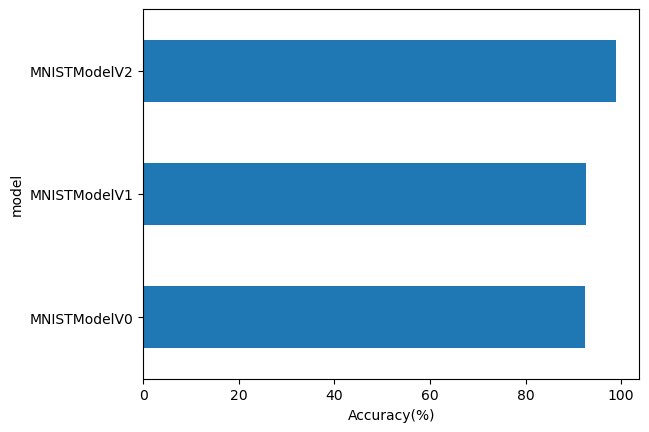

In [42]:
compare_results.set_index("model")["model accuracy"].plot(kind = 'barh')
plt.xlabel("Accuracy(%)")
plt.ylabel("model")

## Taking random data and make predictions on them

In [60]:
def prediction(model: torch.nn.Module,
              data: list, # takes the image as list
              device):

    model.to(device)
    label_list = []
    model.eval()

    with torch.inference_mode():
        for sample in data:

            # Sample is a single image, Whlie passing it through the model, it expects the shape of the image to be like
            # (batch_size,color_channel,height,weight), as a single image doesn't have batch size, unsqueeze operation should be done
            sample = sample.unsqueeze(dim = 0).to(device) # Pass to the target device
            
            y_predict = model(sample)
    
            predict_label = torch.softmax(y_predict,dim=1).argmax(dim=1)

            
            label_list.append(predict_label.cpu()) # Get predict label off the gpu for further calculation
            
    
    return torch.stack(label_list)
    
        

In [61]:
# Creating random data
import random
random.seed(420)


test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
    


In [62]:
type(test_samples),len(test_samples)

(list, 9)

(-0.5, 27.5, 27.5, -0.5)

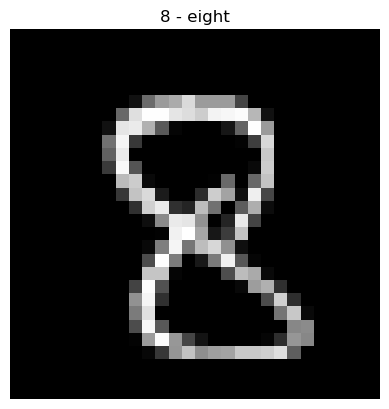

In [63]:
# Plotting the first example of test sample
plt.imshow(test_samples[0].squeeze(),cmap = 'gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [64]:
test_samples[0].unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [65]:
prediction_sample_data = prediction(model = model_2,
                                   data = test_samples,
                                   device = device)

In [67]:
prediction_sample_data.unsqueezeshape

torch.Size([9, 1])

In [ ]:
# Visualization the model performance


## Again Practice

In [68]:
# predicting on random variable
def practice_predict(model: torch.nn.Module,
                    data: list,
                    device):

    pred_label = []

    model.to(device)

    model.eval()


    with torch.inference_mode():
        
        for sample in data:

            # model takes the data with the batch size

            sample = sample.unsqueeze(dim =0)

            y_pred = model(sample)

            pred_label_single = torch.softmax(y_pred,dim = 1).argmax(dim = 1)

            pred_label.append(pred_label_single.cpu())

    return torch.stack(pred_label)

            

        # Sample represents a single image

SyntaxError: expected ':' (968876764.py, line 13)